<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/Combined_Plots_SPI%26SPEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter, YearLocator

In [30]:
from google.colab import files
uploaded = files.upload()

Saving MonthlyDataLCUVS2.csv to MonthlyDataLCUVS2 (2).csv


In [31]:
# Replace 'your_file.csv' with the actual name of your file
df = pd.read_csv('MonthlyDataLCUVS2.csv', delimiter= ';', skipinitialspace=True)

# Display the first few rows to understand the structure
print(df.head(2))

         date  SAVI_UVS  MSAVI_UVS  NDVI_UVS   EVI_UVS    RF_UVS    ET_UVS  \
0  2019/03/31  0.423300   0.415157  0.614560  0.456100  3.494194  3.793974   
1  2019/04/30  0.423543   0.413157  0.580767  0.475743  2.294667  2.762200   

   SPEI3_UVS  SPI3_UVS   VCI_UVS  ...  MSAVI_LC   NDVI_LC   EVI_LC     RF_LC  \
0   1.101960  0.300789  0.371444  ...  0.379540  0.614560  0.59602  5.594616   
1   0.097428  0.301395  0.468333  ...  0.327233  0.580767  0.53305  2.531303   

      ET_LC  SPEI3_LC   SPI3_LC  VCI_LC  Nino3.4_LC    DMI_LC  
0  4.062029  1.101960  0.762170   0.551    0.867725  0.377138  
1  2.988177  0.097428  0.066812   0.592    0.740107  0.442555  

[2 rows x 23 columns]


In [32]:
# Step 1: Install required packages (skip if already installed)
!pip install pandas matplotlib
!pip install folium
!pip install rasterio

In [38]:
# Assuming you've already loaded your DataFrame (df) from a CSV file because data is separated by semicolon and not "," as expected
try:
    df = pd.read_csv('MonthlyDataLCUVS2.csv', sep=';', encoding='utf-8', engine='python') # added encoding and engine
    df.info()
except (pd.errors.ParserError, TypeError) as e:
    print(f"Error reading CSV: {e}")
    #If error still appears, try another encoding (latin-1, iso-8859-1, etc.) or display a few lines of your file
    with open('MonthlyDataLCUVS2.csv', 'r') as file:
        for i in range(5): #display the first 5 lines to user to review
            print(file.readline())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         58 non-null     object 
 1   SAVI_UVS     58 non-null     float64
 2   MSAVI_UVS    58 non-null     float64
 3   NDVI_UVS     58 non-null     float64
 4   EVI_UVS      58 non-null     float64
 5   RF_UVS       58 non-null     float64
 6   ET_UVS       58 non-null     float64
 7   SPEI3_UVS    58 non-null     float64
 8   SPI3_UVS     58 non-null     float64
 9   VCI_UVS      58 non-null     float64
 10  Nino3.4_UVS  58 non-null     float64
 11  DMI_UVS      58 non-null     float64
 12  SAVI_LC      58 non-null     float64
 13  MSAVI_LC     58 non-null     float64
 14  NDVI_LC      58 non-null     float64
 15  EVI_LC       58 non-null     float64
 16  RF_LC        58 non-null     float64
 17  ET_LC        58 non-null     float64
 18  SPEI3_LC     58 non-null     float64
 19  SPI3_LC   

In [41]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Now you can use strftime
dates = df['date']
formatted_dates = [d.strftime('%Y-%m') for d in dates[::3]]

print(formatted_dates)

['2019-03', '2019-06', '2019-09', '2019-12', '2020-03', '2020-06', '2020-09', '2020-12', '2021-03', '2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09', '2022-12', '2023-03', '2023-06', '2023-09', '2023-12']


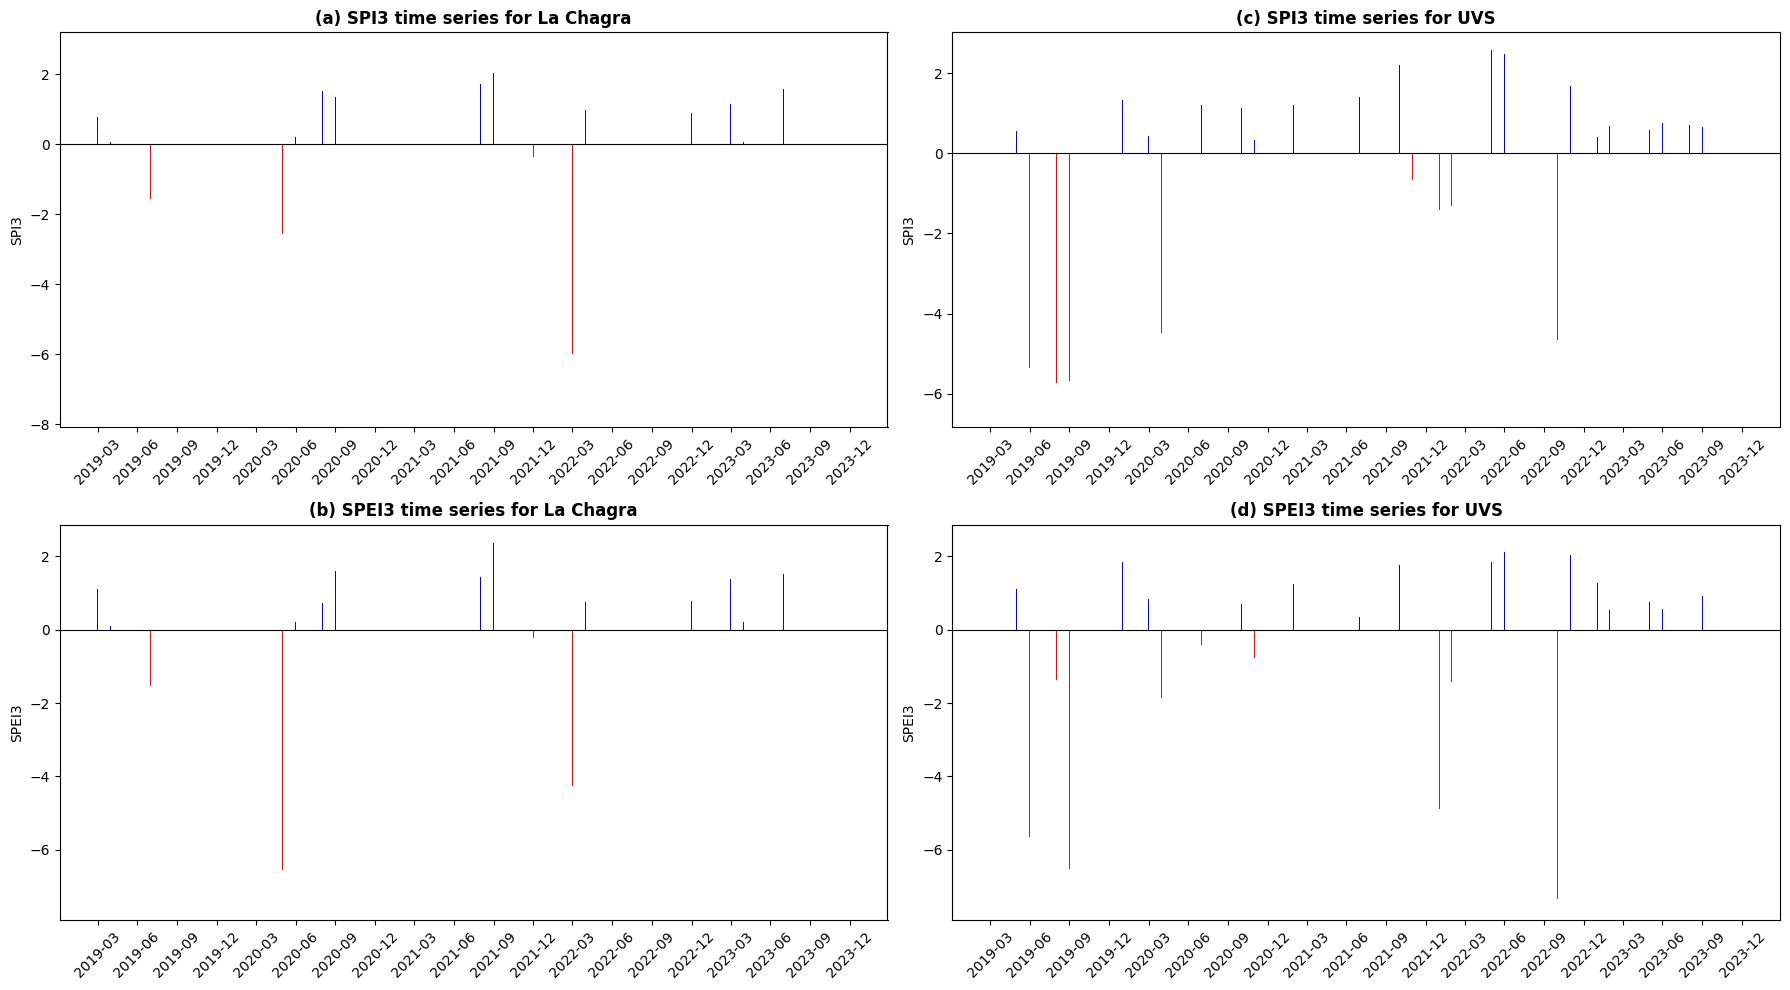

In [42]:
# Define plot function
def plot_spi_spei_bars(ax, dates, values, title, ylabel):
    colors = ['blue' if v >= 0 else 'red' for v in values]
    ax.bar(dates, values, color=colors)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel)
    ax.set_xticks(dates[::3])
    ax.set_xticklabels([d.strftime('%Y-%m') for d in dates[::3]], rotation=45)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# Plot SPI and SPEI for both locations
# Replace with the correct column names for SPI3_LC, SPI3_UVS, SPEI3_LC, SPEI3_UVS if different
plot_spi_spei_bars(axs[0], df['date'], df['SPI3_LC'], '(a) SPI3 time series for La Chagra', 'SPI3')
plot_spi_spei_bars(axs[1], df['date'], df['SPI3_UVS'], '(c) SPI3 time series for UVS', 'SPI3')
plot_spi_spei_bars(axs[2], df['date'], df['SPEI3_LC'], '(b) SPEI3 time series for La Chagra', 'SPEI3')
plot_spi_spei_bars(axs[3], df['date'], df['SPEI3_UVS'], '(d) SPEI3 time series for UVS', 'SPEI3')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [43]:
# Define plot function with thicker bars
def plot_spi_spei_bars(ax, dates, values, title, ylabel):
    colors = ['blue' if v >= 0 else 'red' for v in values]
    ax.bar(dates, values, color=colors, width=25)  # <-- Thick bars here!
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel)

    # Only 4 ticks per year for clarity
    tick_months = [1, 4, 7, 10]
    tick_mask = dates.dt.month.isin(tick_months)
    xticks = dates[tick_mask]
    ax.set_xticks(xticks)
    ax.set_xticklabels([d.strftime('%Y-%m') for d in xticks], rotation=45)


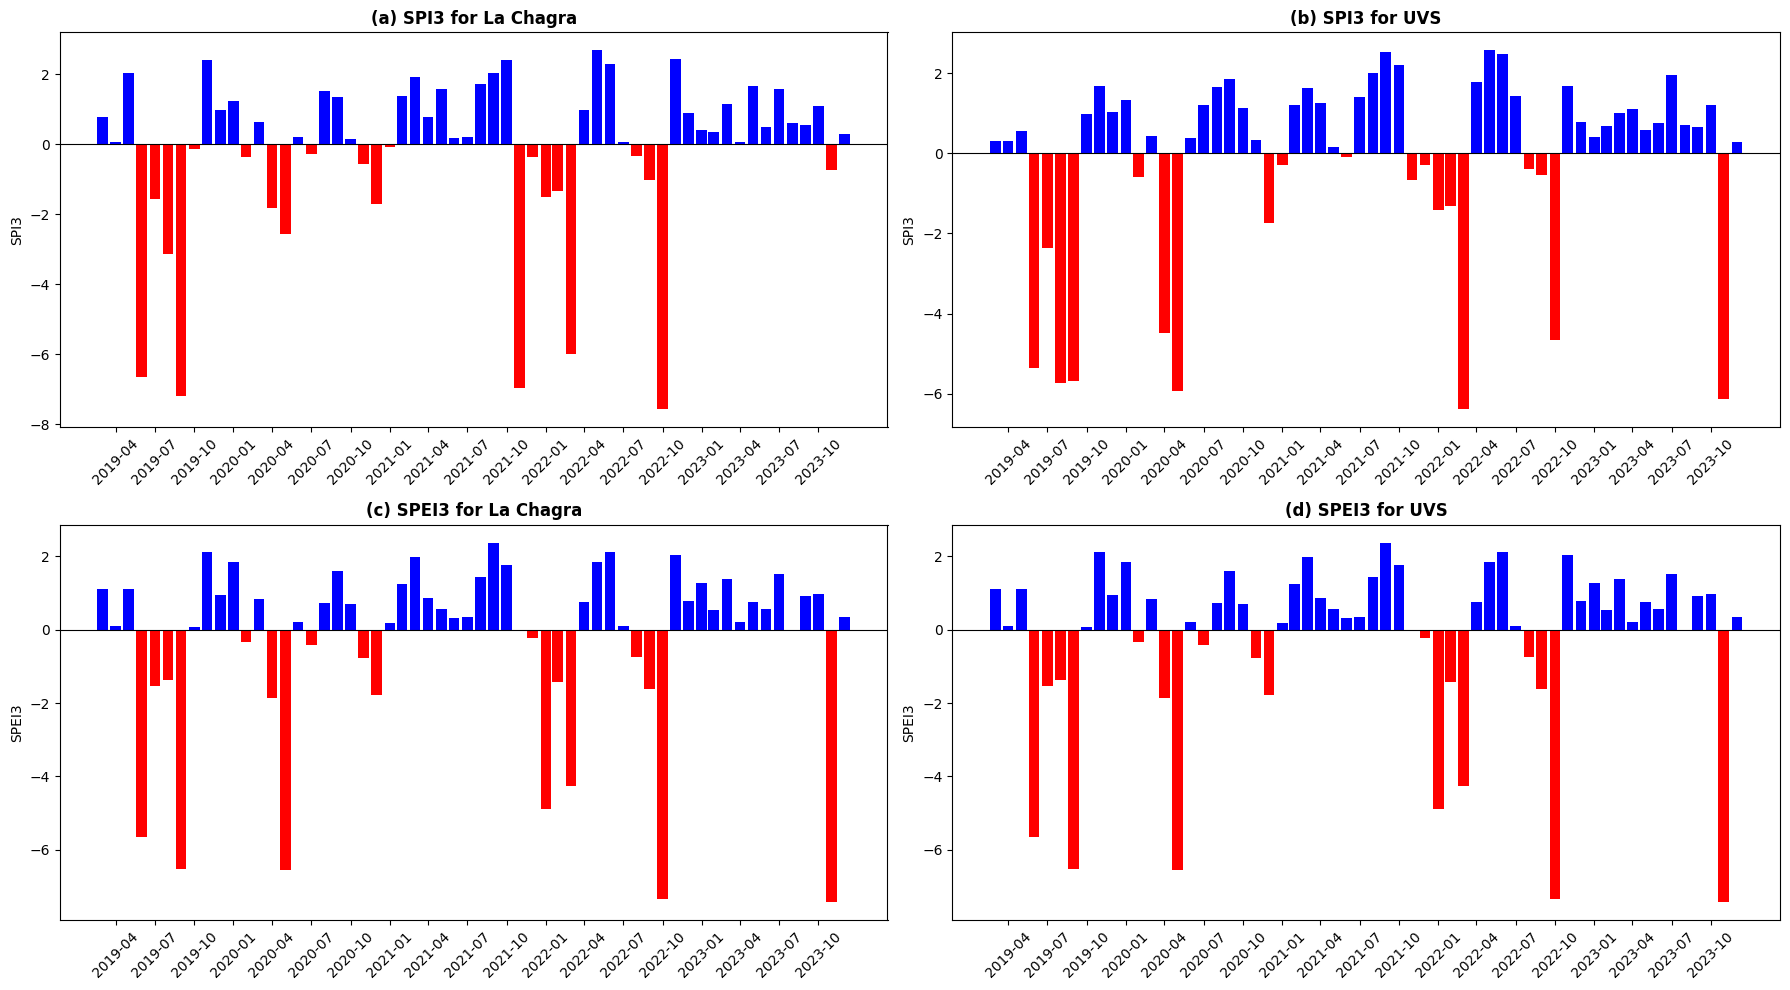

In [44]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# Plot SPI and SPEI for both locations
plot_spi_spei_bars(axs[0], df['date'], df['SPI3_LC'], '(a) SPI3 for La Chagra', 'SPI3')
plot_spi_spei_bars(axs[1], df['date'], df['SPI3_UVS'], '(b) SPI3 for UVS', 'SPI3')
plot_spi_spei_bars(axs[2], df['date'], df['SPEI3_LC'], '(c) SPEI3 for La Chagra', 'SPEI3')
plot_spi_spei_bars(axs[3], df['date'], df['SPEI3_UVS'], '(d) SPEI3 for UVS', 'SPEI3')

plt.tight_layout()
plt.show()


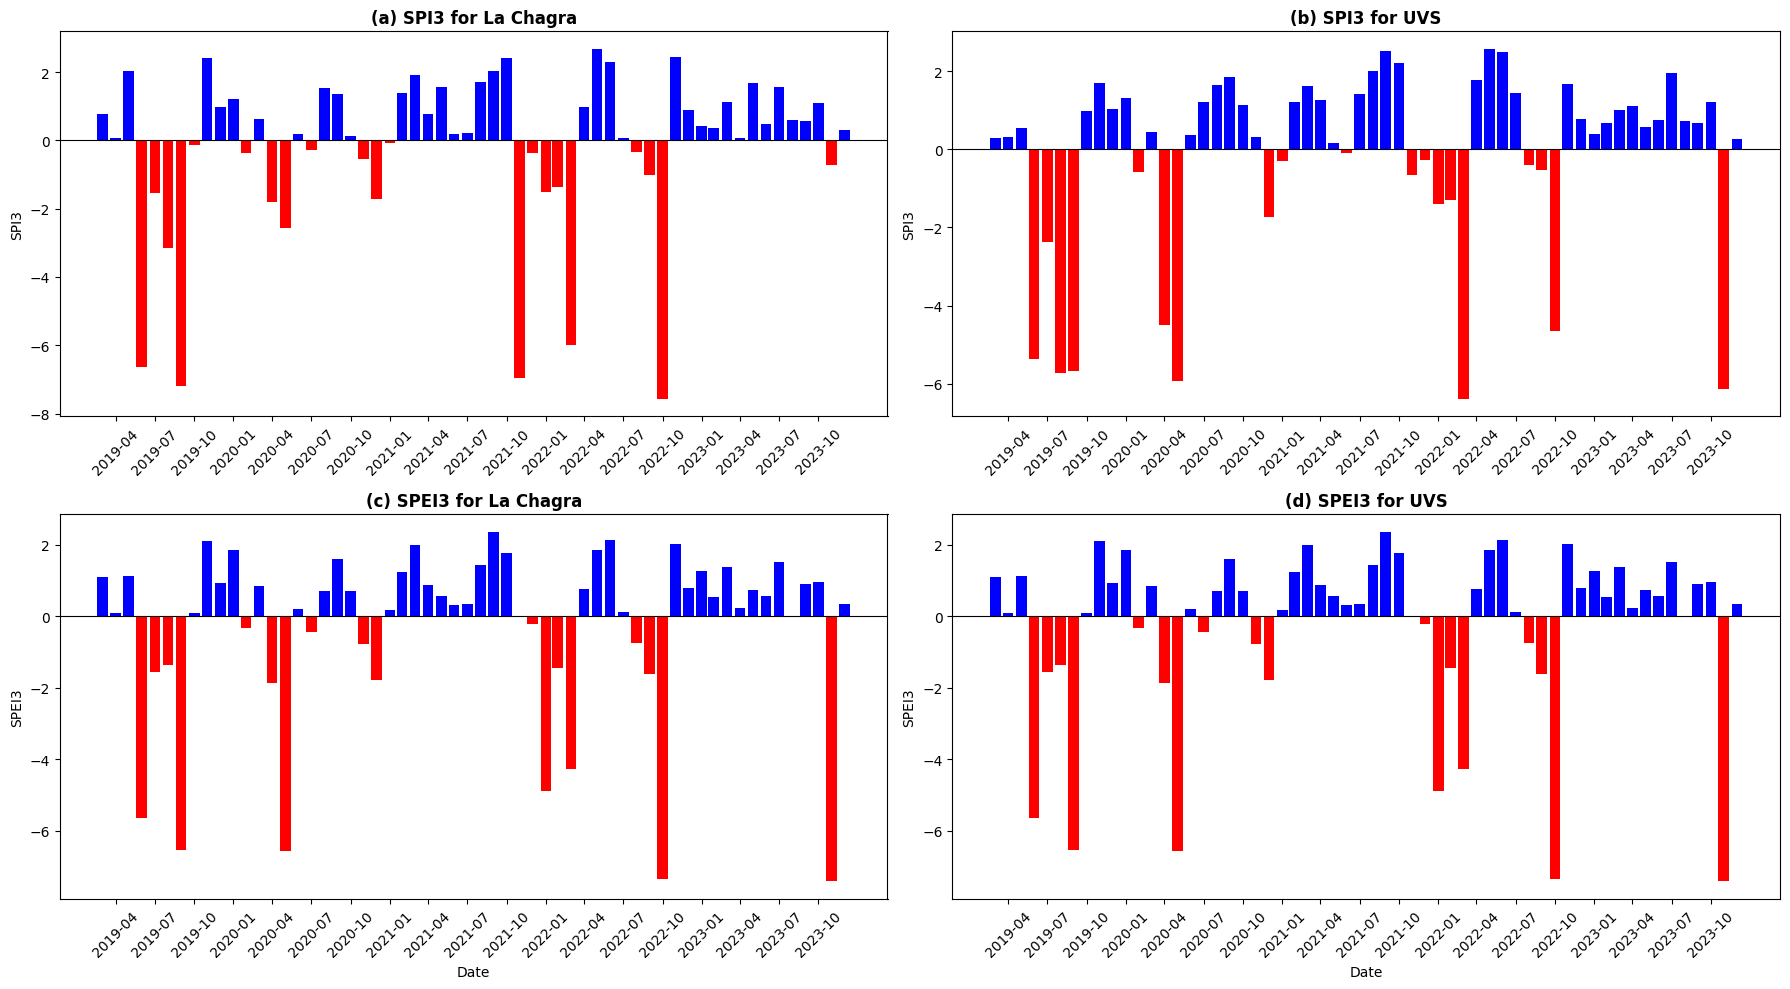

In [45]:
# Define plot function with thicker bars and axis labels
def plot_spi_spei_bars(ax, dates, values, title, ylabel, show_xlabel=False):
    colors = ['blue' if v >= 0 else 'red' for v in values]
    ax.bar(dates, values, color=colors, width=25)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel)

    # Show x-axis label only if flagged
    if show_xlabel:
        ax.set_xlabel('Date')

    # Only 4 ticks per year for clarity
    tick_months = [1, 4, 7, 10]
    tick_mask = dates.dt.month.isin(tick_months)
    xticks = dates[tick_mask]
    ax.set_xticks(xticks)
    ax.set_xticklabels([d.strftime('%Y-%m') for d in xticks], rotation=45)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.flatten()

# Plot SPI and SPEI for both locations
plot_spi_spei_bars(axs[0], df['date'], df['SPI3_LC'], '(a) SPI3 for La Chagra', 'SPI3')
plot_spi_spei_bars(axs[1], df['date'], df['SPI3_UVS'], '(b) SPI3 for UVS', 'SPI3')
plot_spi_spei_bars(axs[2], df['date'], df['SPEI3_LC'], '(c) SPEI3 for La Chagra', 'SPEI3', show_xlabel=True)
plot_spi_spei_bars(axs[3], df['date'], df['SPEI3_UVS'], '(d) SPEI3 for UVS', 'SPEI3', show_xlabel=True)

# Adjust layout
plt.tight_layout()
plt.show()
